In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import * # to imitate ggplot
import random

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay, accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight

# specify option to see all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
pwd

'/Users/katharynloweth/Desktop/Data_Science_II/PPOL5204_FinalProject/Python_code'

In [3]:
os.chdir("../")

In [4]:
pwd

'/Users/katharynloweth/Desktop/Data_Science_II/PPOL5204_FinalProject'

In [129]:
NWI = pd.read_csv("Datasets/Loweth_PPOL5204_merged_data.csv", header=0)

NWI.head()


STATEFP  COUNTYFP  TRACTCE  BLKGRPCE  \
0       10         3    12900         3   
1       10         3    12300         2   
2       10         3     1902         1   
3       10         3    13604         2   
4       10         3    13610         4   

                                     CBSA_Name  TotPop  CountHU     HH  \
0  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD    1524    659.0  629.0   
1  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD    1416    623.0  501.0   
2  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD     654    394.0  269.0   
3  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD    1814    715.0  689.0   
4  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD     554    242.0  242.0   

   P_WrkAge  AutoOwn0   Pct_AO0  AutoOwn1   Pct_AO1  AutoOwn2p  Pct_AO2p  \
0     0.678        58  0.092210       262  0.416534        309  0.491256   
1     0.672        94  0.187625       246  0.491018        161  0.321357   
2     0.647        65  0.241636        57  0.211896        147  0.546468   
3     0.480        22  0.031930       247  0.358491        420  0.609579   
4     0.572         0  0.000000        93  0.384298        149  0.615702   

   Workers  R_LowWageWk  R_MedWageWk  R_HiWageWk  R_PCTLOWWAGE  D2B_E8MIXA  \
0      676          204          222         250      0.301775    0.612308   
1      641          148          226         267      0.230889    0.822707   
2      302           94          112          96      0.311258    0.426493   
3      918          230          194         494      0.250545    0.713066   
4      295           55           67         173      0.186441    0.490111   

   D2A_EPHHM         D3B       D4A  NatWalkInd  Shape_Length    Shape_Area  \
0   0.758624   32.604440    305.78   13.666667  11707.783050  2.858097e+06   
1   0.556826  105.160430    705.43   14.833333   3811.425373  4.763823e+05   
2   0.612211   63.533168    130.09   13.666667  12207.350080  5.467280e+06   
3   0.642834   27.905853 -99999.00    7.833333   7947.652474  2.321174e+06   
4   0.313808   19.787490 -99999.00    4.500000   5359.083933  1.047404e+06   

             NWI_category  COUNTYFP_fix  TRACTCE_fix     new_geoid  \
0  Above_Average_Walkable             3        12900  100030129003   
1  Above_Average_Walkable             3        12300  100030123002   
2  Above_Average_Walkable             3         1902  100030019021   
3  Below_Average_Walkable             3        13604  100030136042   
4          Least_Walkable             3        13610  100030136104   

   Median_HH_Income  Median_Pop_Age  Median_Male_Age  Median_Female_Age  \
0           79936.0            33.6             32.2               35.5   
1           47350.0            26.4             26.5               26.3   
2           60156.0            38.7             53.1               38.4   
3          129625.0            44.3             41.5               49.1   
4          105370.0            56.6             53.4               60.4   

   Race_Total_Count  White  Black  AIAN  Asian  Hawaiian_PacIsl  Other_Race  \
0              1713   1143    473     0     19               12           6   
1              1518    876     85    38     79                0           5   
2               591      5    492     0      0                0          12   
3              1708   1602     73     0     33                0           0   
4               479    479      0     0      0                0           0   

   Two_Races  Commute_Total_Count  N_Commute_less10  N_Commute_10to14  \
0         60                  712               123               124   
1        435                  561                28               102   
2         82                  319               116                51   
3          0                  718                46                37   
4          0                  276                31                64   

   N_Commute_15to19  N_Commute_20to24  N_Commute_25to29  N_Commute_30to34  \
0                88               115    

## Imputing and Removing Missing Data 

In [130]:
HHincome_median = NWI.groupby('CBSA_Name')["Median_HH_Income"].median().to_dict()
Maleage_median = NWI.groupby('CBSA_Name')["Median_Male_Age"].median().to_dict()
Femaleage_median = NWI.groupby('CBSA_Name')["Median_Female_Age"].median().to_dict()


NWI["median_HH_income_imput"] = NWI.loc[:, "Median_HH_Income"]
NWI["median_Male_Age_imput"] = NWI.loc[:, "Median_Male_Age"]
NWI["median_Female_Age_imput"] = NWI.loc[:, "Median_Female_Age"]



NWI["median_HH_income_imput"] = NWI["median_HH_income_imput"].fillna(NWI["CBSA_Name"].map(HHincome_median))
NWI["median_Male_Age_imput"] = NWI["median_Male_Age_imput"].fillna(NWI["CBSA_Name"].map(Maleage_median))
NWI["median_Female_Age_imput"] = NWI["median_Female_Age_imput"].fillna(NWI["CBSA_Name"].map(Femaleage_median))
                                                                      
                                                                      
                                                     

In [131]:
NWI_v2 = NWI.drop(columns = ['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE','AutoOwn0','AutoOwn1', 'AutoOwn2p',
                             'Shape_Length', 'Shape_Area','COUNTYFP_fix','TRACTCE_fix',
                             'Median_HH_Income', 'Median_Male_Age', 'Median_Female_Age', 'White', 'Black', 'AIAN', 
                             'Asian', 'Hawaiian_PacIsl', 'Other_Race', 'Two_Races',
                            'N_Commute_less10', 'N_Commute_10to14','N_Commute_15to19', 'N_Commute_20to24', 'N_Commute_25to29','N_Commute_30to34',
                             'N_Commute_35to44', 'N_Commute_45to59','N_Commute_more60',
                            'N_car', 'N_pubtrans', 'N_walk','N_bike_motorcycle', 'N_Not_Latino', 'N_Latino', 'No_School_Comp', 'HS_Diploma', 'Associates_Deg',
                             'Bachelors_Deg', 'Masters_Deg', 'Doctorate_Deg'])
                  


In [132]:
NWI_noNA = NWI_v2.dropna()
NWI_noNA.shape

(69213, 59)

### making polynomials/interaction variables

In [9]:
NWI_noNA["Pct_AO0_sq"] = NWI_noNA["Pct_AO0"]**2
NWI_noNA["P_WrkAge_sq"] = NWI_noNA["P_WrkAge"]**2
NWI_noNA["R_PCTLOWWAGE_sq"] = NWI_noNA["R_PCTLOWWAGE"]**2
NWI_noNA["N_car_perc_sq"] = NWI_noNA["N_car_perc"]**2
NWI_noNA["N_pubtrans_perc_sq"] = NWI_noNA["N_pubtrans_perc"]**2
NWI_noNA["N_walk_perc_sq"] = NWI_noNA["N_walk_perc"]**2
NWI_noNA["N_bike_motorcycle_perc_sq"] = NWI_noNA["N_bike_motorcycle_perc"]**2
NWI_noNA["median_female_age_imput_sq"] = NWI_noNA['median_Female_Age_imput']**2
NWI_noNA["median_male_age_imput_sq"] = NWI_noNA["median_Male_Age_imput"]**2



NWI_noNA["masters_35to44_commute_int"] = NWI_noNA['Masters_Deg_perc']*NWI_noNA['N_Commute_35to44_perc']
NWI_noNA["hawaiian_workage_int"] = NWI_noNA['Hawaiian_PacIsl_perc']*NWI_noNA['P_WrkAge']
NWI_noNA["doctorate_25to29_commute_int"] = NWI_noNA['Doctorate_Deg_perc']*NWI_noNA['N_Commute_25to29_perc']
NWI_noNA["doctorate_black_int"] = NWI_noNA['Doctorate_Deg_perc'] * NWI_noNA['Black_perc']
NWI_noNA["workers_more60_commute_int"] = NWI_noNA['N_Commute_more60_perc']*NWI_noNA["Workers"]
NWI_noNA["workers_25to29_commute_int"] = NWI_noNA['N_Commute_25to29_perc']*NWI_noNA["Workers"]
NWI_noNA["AIAN_walk_int"] = NWI_noNA['N_walk_perc']* NWI_noNA['AIAN_perc']
NWI_noNA["walk_HU_int"] = NWI_noNA['CountHU']*NWI_noNA['N_walk_perc']
NWI_noNA["HU_highwg_int"] = NWI_noNA['CountHU']*NWI_noNA['R_HiWageWk']
NWI_noNA["walk_highwg_int"] = NWI_noNA['R_HiWageWk']*NWI_noNA['N_walk_perc']


/var/folders/zd/g468sr211nz26mz91q_cxlkr0000gn/T/ipykernel_62088/2031317324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/zd/g468sr211nz26mz91q_cxlkr0000gn/T/ipykernel_62088/2031317324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/zd/g468sr211nz26mz91q_cxlkr0000gn/T/ipykernel_62088/2031317324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [133]:
NWI_v2 = NWI_noNA[NWI_noNA.Workers_pct <= 1] #dropping the observations where Workers_pct is greater than 1 becasuse it is nonsencical 
#and they are less than 1% of observations


In [134]:
NWI_v2.shape

(68941, 59)

In [142]:
NWI_v2.White_perc.describe()
NWI_v2.Black_perc.describe()

NWI_v2.R_PCTLOWWAGE.describe()

NWI_v2.Pct_AO0.describe()
NWI_v2.Pct_AO2p.describe()
NWI_v2.N_car_perc.describe()
NWI_v2.N_pubtrans_perc.describe()

count    68941.000000
mean         0.101485
std          0.179823
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max          1.000000
Name: N_pubtrans_perc, dtype: float64

In [11]:
NWI_v2.columns

Index(['CBSA_Name', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'Pct_AO0',
       'Pct_AO1', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk',
       'R_HiWageWk', 'R_PCTLOWWAGE', 'D2B_E8MIXA', 'D2A_EPHHM', 'D3B', 'D4A',
       'NatWalkInd', 'NWI_category', 'new_geoid', 'Median_Pop_Age',
       'Race_Total_Count', 'Commute_Total_Count', 'Latino_Total_Count',
       'Educ_Total_Count', '2020_Census_PopTotal', 'Workers_pct',
       'Census_Pop_change', 'N_Commute_less10_perc', 'N_Commute_10to14_perc',
       'N_Commute_15to19_perc', 'N_Commute_20to24_perc',
       'N_Commute_25to29_perc', 'N_Commute_30to34_perc',
       'N_Commute_35to44_perc', 'N_Commute_45to59_perc',
       'N_Commute_more60_perc', 'N_car_perc', 'N_pubtrans_perc', 'N_walk_perc',
       'N_bike_motorcycle_perc', 'White_perc', 'Black_perc', 'AIAN_perc',
       'Asian_perc', 'Hawaiian_PacIsl_perc', 'Other_Race_perc',
       'Two_Races_perc', 'N_Latino_perc', 'N_Not_Latino_perc',
       'No_School_Comp_perc', 'HS_Diploma_per

In [12]:
continuous_var = NWI_v2.drop(columns = ['CBSA_Name','NatWalkInd', 'NWI_category', 'new_geoid']).columns

scaler = StandardScaler()
NWI_v2[continuous_var] = scaler.fit_transform(NWI_v2[continuous_var])

NWI_v2.head()

/var/folders/zd/g468sr211nz26mz91q_cxlkr0000gn/T/ipykernel_62088/2638896299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CBSA_Name    TotPop   CountHU        HH  \
0  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  0.093717  0.206628  0.319616   
1  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD -0.045961  0.088616 -0.141363   
2  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD -1.031465 -0.662074 -0.976889   
3  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  0.468777  0.390203  0.535700   
4  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD -1.160796 -1.160348 -1.074126   

   P_WrkAge   Pct_AO0   Pct_AO1  Pct_AO2p   Workers  R_LowWageWk  R_MedWageWk  \
0  0.715681 -0.202214  0.499504 -0.161083  0.006198     0.726476     0.124744   
1  0.650848  0.321885  0.983174 -0.857281 -0.092781     0.003246     0.158417   
2  0.380710  0.618558 -0.829340  0.065162 -1.051473    -0.694156    -0.801259   
3 -1.423816 -0.533319  0.122591  0.323773  0.690574     1.062262    -0.110966   
4 -0.429706 -0.708707  0.290171  0.348864 -1.071269    -1.197834    -1.180078   

   R_HiWageWk  R_PCTLOWWAGE  D2B_E8MIXA  D2A_EPHHM       D3B       D4A  \
0   -0.333251      1.449911    0.366243   1.208619 -0.808788  0.746030   
1   -0.251000      0.099201    1.359628   0.312541  0.061037  0.754325   
2   -1.078346      1.630609   -0.511072   0.558476 -0.438004  0.742383   
3    0.847290      0.473730    0.841964   0.694454 -0.865116 -1.335873   
4   -0.705798     -0.747752   -0.210700  -0.766572 -0.962441 -1.335873   

   NatWalkInd            NWI_category     new_geoid  Median_Pop_Age  \
0   13.666667  Above_Average_Walkable  100030129003       -0.730107   
1   14.833333  Above_Average_Walkable  100030123002       -1.486793   
2   13.666667  Above_Average_Walkable  100030019021       -0.194121   
3    7.833333  Below_Average_Walkable  100030136042        0.394413   
4    4.500000          Least_Walkable  100030136104        1.687086   

   Race_Total_Count  Commute_Total_Count  Latino_Total_Count  \
0          0.427891             0.337583            0.427891   
1          0.149389            -0.121751            0.149389   
2         -1.174567            -0.857902           -1.174567   
3          0.420750             0.355834            0.420750   
4         -1.334527            -0.988706           -1.334527   

   Educ_Total_Count  2020_Census_PopTotal  Workers_pct  Census_Pop_change  \
0          0.419314             -0.169088    -0.301549          -0.291400   
1         -0.379098             -0.199256    -0.226117          -0.146475   
2         -1.164734             -1.096381    -0.150684           0.174313   
3          0.517252              0.307262     0.218097          -0.275117   
4         -1.190283             -1.285333     0.436013           0.143374   

   N_Commute_less10_perc  N_Commute_10to14_perc  N_Commute_15to19_perc  \
0               0.825161               0.626470              -0.188239   
1              -0.466583               0.732693               1.173401   
2               2.870423               0.520247               0.395321   
3              -0.358937              -0.648208               0.784361   
4               0.179289               1.263809               0.492581   

   N_Commute_20to24_perc  N_Commute_25to29_perc  N_Commute_30to34_perc  \
0               0.150729              -0.578275               0.351250   
1               0.440056               0.144380              -1.080338   
2              -0.620807              -1.011868              -1.080338   
3               1.404476              -0.144682              -1.175777   
4               1.500918              -0.000151              -1.462095   

   N_Commute_35to44_perc  N_Commute_45to59_perc  N_Commute_more60_perc  \
0              -0.283754              -0.957200              -0.344096   
1              -0.154400               0.148238              -0.772827   
2              -1.059874              -1.067744               0.599111   
3              -0.283754              -0.736113               0.684857   
4              -1.059874              -0.515025              -0.515589   

   N_car_perc 

In [13]:
NWI_v2.head()

CBSA_Name    TotPop   CountHU        HH  \
0  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  0.093717  0.206628  0.319616   
1  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD -0.045961  0.088616 -0.141363   
2  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD -1.031465 -0.662074 -0.976889   
3  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD  0.468777  0.390203  0.535700   
4  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD -1.160796 -1.160348 -1.074126   

   P_WrkAge   Pct_AO0   Pct_AO1  Pct_AO2p   Workers  R_LowWageWk  R_MedWageWk  \
0  0.715681 -0.202214  0.499504 -0.161083  0.006198     0.726476     0.124744   
1  0.650848  0.321885  0.983174 -0.857281 -0.092781     0.003246     0.158417   
2  0.380710  0.618558 -0.829340  0.065162 -1.051473    -0.694156    -0.801259   
3 -1.423816 -0.533319  0.122591  0.323773  0.690574     1.062262    -0.110966   
4 -0.429706 -0.708707  0.290171  0.348864 -1.071269    -1.197834    -1.180078   

   R_HiWageWk  R_PCTLOWWAGE  D2B_E8MIXA  D2A_EPHHM       D3B       D4A  \
0   -0.333251      1.449911    0.366243   1.208619 -0.808788  0.746030   
1   -0.251000      0.099201    1.359628   0.312541  0.061037  0.754325   
2   -1.078346      1.630609   -0.511072   0.558476 -0.438004  0.742383   
3    0.847290      0.473730    0.841964   0.694454 -0.865116 -1.335873   
4   -0.705798     -0.747752   -0.210700  -0.766572 -0.962441 -1.335873   

   NatWalkInd            NWI_category     new_geoid  Median_Pop_Age  \
0   13.666667  Above_Average_Walkable  100030129003       -0.730107   
1   14.833333  Above_Average_Walkable  100030123002       -1.486793   
2   13.666667  Above_Average_Walkable  100030019021       -0.194121   
3    7.833333  Below_Average_Walkable  100030136042        0.394413   
4    4.500000          Least_Walkable  100030136104        1.687086   

   Race_Total_Count  Commute_Total_Count  Latino_Total_Count  \
0          0.427891             0.337583            0.427891   
1          0.149389            -0.121751            0.149389   
2         -1.174567            -0.857902           -1.174567   
3          0.420750             0.355834            0.420750   
4         -1.334527            -0.988706           -1.334527   

   Educ_Total_Count  2020_Census_PopTotal  Workers_pct  Census_Pop_change  \
0          0.419314             -0.169088    -0.301549          -0.291400   
1         -0.379098             -0.199256    -0.226117          -0.146475   
2         -1.164734             -1.096381    -0.150684           0.174313   
3          0.517252              0.307262     0.218097          -0.275117   
4         -1.190283             -1.285333     0.436013           0.143374   

   N_Commute_less10_perc  N_Commute_10to14_perc  N_Commute_15to19_perc  \
0               0.825161               0.626470              -0.188239   
1              -0.466583               0.732693               1.173401   
2               2.870423               0.520247               0.395321   
3              -0.358937              -0.648208               0.784361   
4               0.179289               1.263809               0.492581   

   N_Commute_20to24_perc  N_Commute_25to29_perc  N_Commute_30to34_perc  \
0               0.150729              -0.578275               0.351250   
1               0.440056               0.144380              -1.080338   
2              -0.620807              -1.011868              -1.080338   
3               1.404476              -0.144682              -1.175777   
4               1.500918              -0.000151              -1.462095   

   N_Commute_35to44_perc  N_Commute_45to59_perc  N_Commute_more60_perc  \
0              -0.283754              -0.957200              -0.344096   
1              -0.154400               0.148238              -0.772827   
2              -1.059874              -1.067744               0.599111   
3              -0.283754              -0.736113               0.684857   
4              -1.059874              -0.515025              -0.515589   

   N_car_perc 

In [14]:
NWI_v2 = pd.get_dummies(NWI_v2, columns = ["CBSA_Name"], drop_first= True)

NWI_v2.columns

Index(['TotPop', 'CountHU', 'HH', 'P_WrkAge', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
       'Workers', 'R_LowWageWk', 'R_MedWageWk',
       ...
       'CBSA_Name_Providence-Warwick, RI-MA', 'CBSA_Name_Raleigh-Cary, NC',
       'CBSA_Name_Richmond, VA', 'CBSA_Name_Salt Lake City, UT',
       'CBSA_Name_San Antonio-New Braunfels, TX',
       'CBSA_Name_Seattle-Tacoma-Bellevue, WA', 'CBSA_Name_St. Louis, MO-IL',
       'CBSA_Name_Tampa-St. Petersburg-Clearwater, FL',
       'CBSA_Name_Virginia Beach-Norfolk-Newport News, VA-NC',
       'CBSA_Name_Washington-Arlington-Alexandria, DC-VA-MD-WV'],
      dtype='object', length=116)

In [127]:
NWI_v2.NWI_category.value_counts()

Above_Average_Walkable    29203
Below_Average_Walkable    19678
Most_Walkable             12244
Least_Walkable             7816
Name: NWI_category, dtype: int64

In [128]:
NWI_v2.NatWalkInd.describe()

count    68941.000000
mean        11.319537
std          4.018156
min          1.000000
25%          8.000000
50%         12.000000
75%         14.500000
max         20.000000
Name: NatWalkInd, dtype: float64

### Factoring Dependent Variable  

Factoring dependent variable is needed for modeling

In [15]:
NWI_v2['NWI_category'] = NWI_v2['NWI_category'].astype('category')
print(NWI_v2['NWI_category'][0:10])
NWI_v2['NWI_category'] = NWI_v2['NWI_category'].cat.reorder_categories(['Least_Walkable', 'Below_Average_Walkable', 'Above_Average_Walkable','Most_Walkable'])
factor = pd.factorize(NWI_v2['NWI_category'], sort = True) 

NWI_v2["NWI_cat"] = factor[0]

#f_definitions = factor[1]

print(factor[0][0:100])
#print(f_definitions)


0    Above_Average_Walkable
1    Above_Average_Walkable
2    Above_Average_Walkable
3    Below_Average_Walkable
4            Least_Walkable
5    Above_Average_Walkable
6            Least_Walkable
7             Most_Walkable
8    Below_Average_Walkable
9    Above_Average_Walkable
Name: NWI_category, dtype: category
Categories (4, object): ['Above_Average_Walkable', 'Below_Average_Walkable', 'Least_Walkable', 'Most_Walkable']
[2 2 2 1 0 2 0 3 1 2 3 2 1 2 2 2 0 2 2 1 1 1 2 2 1 2 2 2 1 3 1 0 2 2 2 3 2
 2 1 1 2 2 2 2 0 2 1 2 1 0 0 2 2 2 1 2 1 0 2 2 3 2 1 1 2 2 2 2 2 1 3 2 2 2
 1 1 2 2 2 2 3 2 2 2 2 1 1 2 2 0 2 1 3 1 2 2 2 2 3 2]


In [16]:
print(NWI_v2.NWI_cat.value_counts())
print(NWI_v2.NWI_category.value_counts()) 

2    29203
1    19678
3    12244
0     7816
Name: NWI_cat, dtype: int64
Above_Average_Walkable    29203
Below_Average_Walkable    19678
Most_Walkable             12244
Least_Walkable             7816
Name: NWI_category, dtype: int64


In [17]:
#saving version with manipulated variables and dummies that is used for analysis as csv file
NWI_v2.to_csv("Datasets/Loweth_PPOL5204_merged_data_v2.csv", sep=',', index=False, encoding='utf-8')

In [18]:
#this is the control set because we know that these four features are used to determine walkability
#testing to see in general if model is working
#features not to be used in overall training and testing
NWI_control = NWI_v2[['D2B_E8MIXA', 'D2A_EPHHM', 'D3B', 'D4A', "NWI_cat"]]
NWI_v3 = NWI_v2.drop(columns = ['D2B_E8MIXA', 'D2A_EPHHM', 'D3B', 'D4A'])

## Creating Training, Test, and Validation Sets

In [19]:
# Splitting into training set and first test set
train_set, test_set_all = train_test_split(NWI_v3, test_size=0.3, random_state=42)

# Splitting the remaining data into second test set
validation_set, test_set = train_test_split(test_set_all, test_size=0.5, random_state=42)

print(train_set.shape)
print(test_set.shape)
print(validation_set.shape)

print(train_set.NWI_category.value_counts())
print(validation_set.NWI_category.value_counts())

(48258, 113)
(10342, 113)
(10341, 113)
Above_Average_Walkable    20352
Below_Average_Walkable    13841
Most_Walkable              8551
Least_Walkable             5514
Name: NWI_category, dtype: int64
Above_Average_Walkable    4448
Below_Average_Walkable    2883
Most_Walkable             1855
Least_Walkable            1155
Name: NWI_category, dtype: int64


In [20]:
train_X = train_set.drop(columns = ["NWI_category", "NWI_cat", "NatWalkInd", "new_geoid", 'Race_Total_Count',
       'Commute_Total_Count', 'Latino_Total_Count', 'Educ_Total_Count'])
train_Y = train_set["NWI_cat"]

validation_X = validation_set.drop(columns = ["NWI_category", "NWI_cat", "NatWalkInd", "new_geoid", 'Race_Total_Count',
       'Commute_Total_Count', 'Latino_Total_Count', 'Educ_Total_Count'])
validation_Y = validation_set["NWI_cat"]

test_X = test_set.drop(columns = ["NWI_category", "NWI_cat", "NatWalkInd", "new_geoid", 'Race_Total_Count',
       'Commute_Total_Count', 'Latino_Total_Count', 'Educ_Total_Count'])
test_Y = test_set['NWI_cat']

In [21]:
control_X = NWI_control.drop(columns = ["NWI_cat"])
control_y = NWI_control["NWI_cat"]


ctrain_X, ctest_X, ctrain_y, ctest_y = train_test_split(control_X, control_y, test_size=0.3, random_state=42)

## Control Tree 

(to see if models at all can predict class based on known features used to calculate metric)

In [24]:
controltree = DecisionTreeClassifier(criterion='entropy', random_state=10)
controltree.fit(ctrain_X, ctrain_y)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [25]:
scores = cross_val_score(controltree, ctrain_X, ctrain_y, cv=5)
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", scores.mean())

Accuracy scores for each fold:  [0.95700373 0.9546208  0.95544965 0.95731012 0.95793182]
Mean cross-validation score:  0.9564632250713601


In [26]:
control_predictions = controltree.predict(ctest_X)
print(classification_report(ctest_y, control_predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2302
           1       0.96      0.97      0.97      5837
           2       0.96      0.96      0.96      8851
           3       0.94      0.94      0.94      3693

    accuracy                           0.96     20683
   macro avg       0.96      0.96      0.96     20683
weighted avg       0.96      0.96      0.96     20683



results confirm relationship between the four variables reportedly used in the calculation of the NWI score. It suggests that there was not a mechanical issue at some point in the calculation of the NWI that may be captured in my models

# Modeling

## Decision Trees

In [27]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=10)
tree.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [28]:
scores = cross_val_score(tree, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", scores.mean())

Accuracy scores for each fold:  [0.41908413 0.42467882 0.42302114 0.42099264 0.42534452]
Mean cross-validation score:  0.4226242506665382


In [22]:
tree2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 10, class_weight = "balanced")
tree2.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=10)

In [23]:
scores = cross_val_score(tree2, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", scores.mean())

Accuracy scores for each fold:  [0.4242644  0.42094903 0.42664733 0.42720962 0.42959279]
Mean cross-validation score:  0.42573263162875874


### Pruned Tree

In [29]:
param_dict = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [50, 100, 200, 300,500,700,900],
    'min_samples_leaf': [1, 2, 5, 10]
}
    
    
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
                           param_grid=param_dict,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fit grid_search to the data
#grid_search.fit(train_X, train_Y)


In [30]:
#print("Best Hyperparameters:", grid_search.best_params_)

# Extract the best model from grid_search
#best_tree_model = grid_search.best_estimator_

In [61]:
best_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_leaf = 5, min_samples_split = 500, random_state=10)

best_tree_model.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=500, random_state=10)

In [62]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores_tree = cross_val_score(best_tree_model, train_X, train_Y, cv=cv, scoring='accuracy')
print("Pruned Tree - 5-Fold CV Mean Accuracy: ", scores_tree.mean())


Pruned Tree - 5-Fold CV Mean Accuracy:  0.5175721147105683


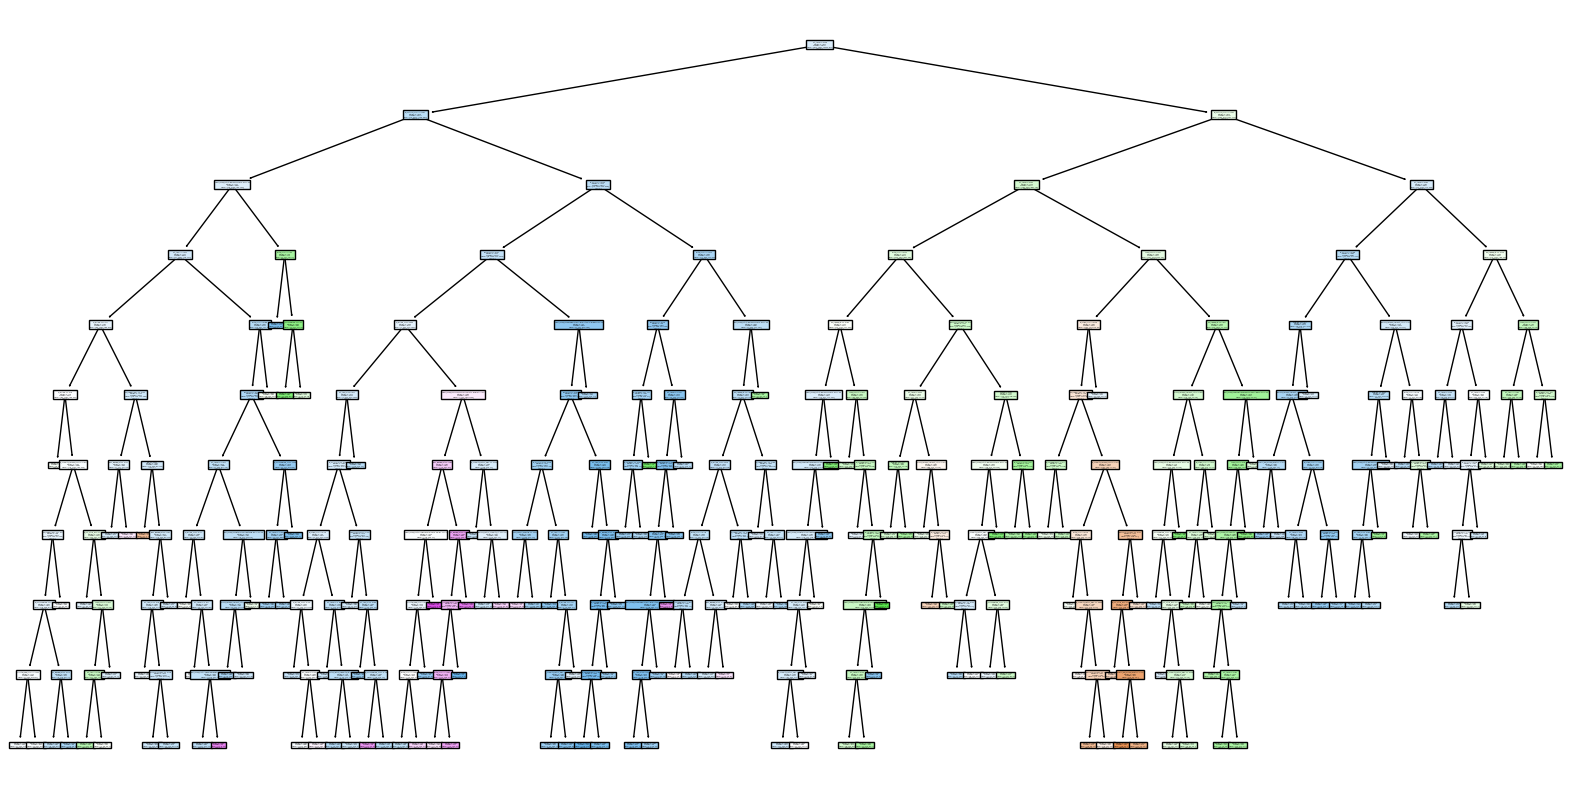

In [63]:
plt.figure(figsize=(20,10))
plot_tree(best_tree_model, filled=True, feature_names= train_X.columns, class_names= train_Y.astype(str))
plt.show()

In [64]:
predictions_tree = best_tree_model.predict(validation_X)
print(classification_report(validation_Y, predictions_tree))

              precision    recall  f1-score   support

           0       0.58      0.25      0.35      1155
           1       0.51      0.47      0.49      2883
           2       0.53      0.79      0.63      4448
           3       0.45      0.13      0.20      1855

    accuracy                           0.52     10341
   macro avg       0.52      0.41      0.42     10341
weighted avg       0.51      0.52      0.48     10341



In [70]:
# Create a confusion matrix
cm_tree = confusion_matrix(validation_Y, predictions_tree)
cm_tree

array([[ 290,  537,  323,    5],
       [ 166, 1348, 1334,   35],
       [  38,  647, 3502,  261],
       [   2,  129, 1481,  243]])

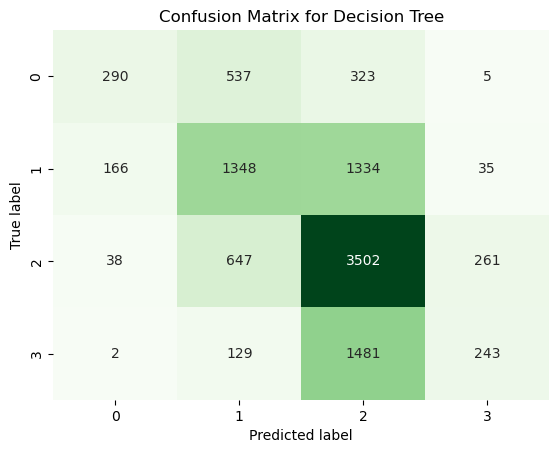

In [145]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Greens):
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Plotting confusion matrices
plot_confusion_matrix(cm_tree, classes=["0", "1", "2", "3"], title='Confusion Matrix for Decision Tree')

## KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_Y)

KNeighborsClassifier()

In [41]:
scores_KNN = cross_val_score(knn, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_KNN)
print("Mean cross-validation score: ", scores_KNN.mean())

Accuracy scores for each fold:  [0.47461666 0.46922918 0.47440945 0.46565123 0.47000311]
Mean cross-validation score:  0.47078192404343844


In [42]:
#cross validation code from datacamp
k_values = [i for i in range (2,140,2)]
scores = []

scaler = StandardScaler()

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, train_X,train_Y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

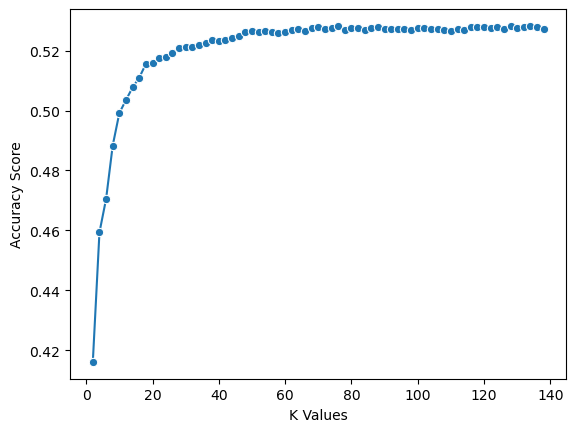

In [43]:
#cross validation code from datacamp
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [44]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=134)

In [45]:
scores_KNN = cross_val_score(knn, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_KNN)
print("Mean cross-validation score: ", scores_KNN.mean())

Accuracy scores for each fold:  [0.53543307 0.52372565 0.53046001 0.52315822 0.52833903]
Mean cross-validation score:  0.528223197207919


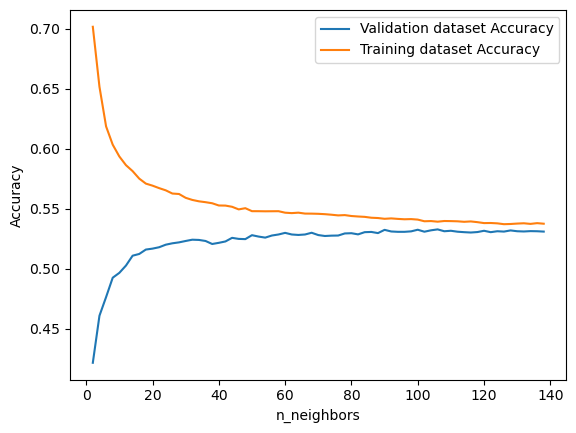

In [46]:
k_values = [i for i in range (2,140,2)]
train_accuracy = np.empty(len(k_values)) 
test_accuracy = np.empty(len(k_values)) 
  
# Loop over K values 
for i, k in enumerate(k_values): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(train_X, train_Y) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(train_X, train_Y) 
    test_accuracy[i] = knn.score(validation_X, validation_Y) 
  
# Generate plot 
plt.plot(k_values, test_accuracy, label = 'Validation dataset Accuracy') 
plt.plot(k_values, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [47]:
#hyperparameter tuning code from machinelearningmastery.com

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(5, 160, 5)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']


# define grid search
grid_knn = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search_knn = GridSearchCV(estimator=model, param_grid=grid_knn, n_jobs=-1, cv=3, scoring='accuracy',error_score=0,verbose=2)

#Fit grid_search to the data
#grid_search_knn.fit(train_X, train_Y)

In [48]:
#print("Best Hyperparameters:", grid_search_knn.best_params_)
# Extract the best model from grid_search


In [79]:
best_knn_model = KNeighborsClassifier(n_neighbors = 65, metric = "manhattan", weights = "distance")

best_knn_model.fit(train_X, train_Y)

KNeighborsClassifier(metric='manhattan', n_neighbors=65, weights='distance')

In [80]:
scores_KNN = cross_val_score(best_knn_model, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_KNN)
print("Mean cross-validation score: ", scores_KNN.mean())

Accuracy scores for each fold:  [0.53905926 0.53180688 0.5397845  0.53061859 0.53445239]
Mean cross-validation score:  0.535144323890947


In [51]:
best_knn_model.score(train_X, train_Y)

1.0

In [81]:
predictions_knn = best_knn_model.predict(validation_X)
print(classification_report(validation_Y, predictions_knn))

              precision    recall  f1-score   support

           0       0.59      0.34      0.43      1155
           1       0.48      0.63      0.55      2883
           2       0.57      0.71      0.63      4448
           3       0.56      0.14      0.22      1855

    accuracy                           0.54     10341
   macro avg       0.55      0.45      0.46     10341
weighted avg       0.55      0.54      0.51     10341



In [88]:
# Get unique elements and their counts
unique_elements, counts = np.unique(predictions_knn, return_counts=True)

# Zip them together for a more readable format
value_counts = dict(zip(unique_elements, counts))

value_counts

{0: 674, 1: 3746, 2: 5473, 3: 448}

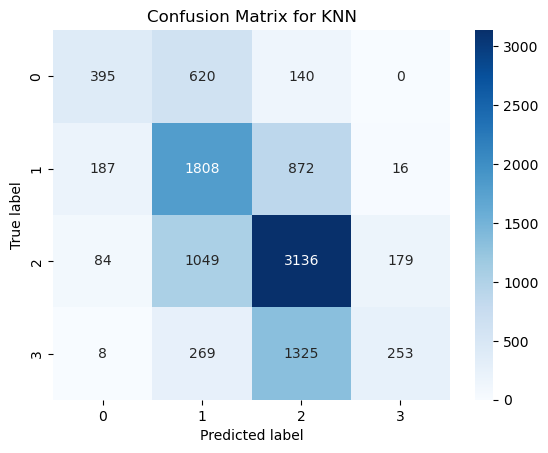

In [93]:
# Plotting confusion matrices
cm_knn = confusion_matrix(validation_Y, predictions_knn)

plot_confusion_matrix(cm_knn, classes=["0", "1", "2", "3"], title='Confusion Matrix for KNN')

## Random Forest

**Default Random Forest Model**

In [53]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(train_X, train_Y)

RandomForestClassifier()

In [54]:
scores_rf = cross_val_score(rf_classifier, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_rf)
print("Mean cross-validation score: ", scores_rf.mean())

Accuracy scores for each fold:  [0.54973063 0.54838375 0.54817654 0.54388146 0.5473008 ]
Mean cross-validation score:  0.5474946370132803


In [25]:
rf_classifier2 = RandomForestClassifier(class_weight = 'balanced_subsample')
rf_classifier2.fit(train_X, train_Y)

scores_rf = cross_val_score(rf_classifier2, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_rf)
print("Mean cross-validation score: ", scores_rf.mean())

Accuracy scores for each fold:  [0.54527559 0.54403232 0.54828015 0.54377785 0.54450316]
Mean cross-validation score:  0.5451738143598663


**Balanced Random Forest Model (default parameters)** model accounts for the differences in frequency across target feature classes

In [30]:


clf = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, random_state=0, bootstrap = False, class_weight = "balanced_subsample")
clf.fit(train_X, train_Y)

BalancedRandomForestClassifier(bootstrap=False,
                               class_weight='balanced_subsample',
                               random_state=0, replacement=True,
                               sampling_strategy='all')

In [31]:
scores = cross_val_score(clf, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores)
print("Mean cross-validation score: ", scores.mean())

Accuracy scores for each fold:  [0.50155408 0.49388728 0.50455864 0.49569993 0.50865195]
Mean cross-validation score:  0.5008703761268263


In [32]:
# Performance assessment
balanced_rf = clf.predict(validation_X)
print("Accuracy on test data:", accuracy_score(validation_Y, balanced_rf))

print(classification_report(validation_Y, balanced_rf))

Accuracy on test data: 0.49637365825355384
              precision    recall  f1-score   support

           0       0.46      0.53      0.49      1155
           1       0.47      0.53      0.50      2883
           2       0.59      0.48      0.53      4448
           3       0.41      0.45      0.43      1855

    accuracy                           0.50     10341
   macro avg       0.48      0.50      0.49     10341
weighted avg       0.51      0.50      0.50     10341



**Tuned Random Forest Model**

In [55]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],  # Number of trees in the forest
    'max_depth': [10, 15, 20, 25],  # Maximum depth of the tree
    'min_samples_split': [50, 100, 200, 300, 500],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  
                           scoring='accuracy',
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fit grid_search to the data
#grid_search_rf.fit(train_X, train_Y)

#print("Best Hyperparameters:", grid_search_rf.best_params_)
# Extract the best model from grid_search
#best_rf_model = grid_search_rf.best_estimator_

In [56]:
#print("Best Hyperparameters:", grid_search_rf.best_params_)
# Extract the best model from grid_search
#best_rf_model = grid_search_rf.best_estimator_

In [83]:
best_rf_model = RandomForestClassifier(criterion= 'gini', max_depth= 25, min_samples_leaf= 5, min_samples_split= 50, n_estimators= 250)

best_rf_model.fit(train_X, train_Y)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=50,
                       n_estimators=250)

In [58]:
scores_rf = cross_val_score(best_rf_model, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_rf)
print("Mean cross-validation score: ", scores_rf.mean())

Accuracy scores for each fold:  [0.55035226 0.54838375 0.54962702 0.54895866 0.55351777]
Mean cross-validation score:  0.5501678921762809


In [84]:
pred_rf = best_rf_model.predict(validation_X)
print(classification_report(validation_Y, pred_rf))


              precision    recall  f1-score   support

           0       0.68      0.25      0.37      1155
           1       0.52      0.54      0.53      2883
           2       0.55      0.80      0.65      4448
           3       0.56      0.14      0.22      1855

    accuracy                           0.55     10341
   macro avg       0.58      0.43      0.44     10341
weighted avg       0.56      0.55      0.51     10341



In [89]:
# Get unique elements and their counts
unique_elements, counts = np.unique(pred_rf, return_counts=True)

# Zip them together for a more readable format
value_counts = dict(zip(unique_elements, counts))

value_counts

{0: 429, 1: 3025, 2: 6439, 3: 448}

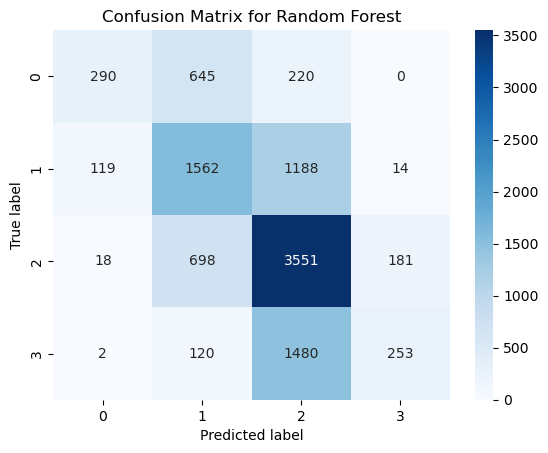

In [92]:
# Plotting confusion matrices
cm_rf = confusion_matrix(validation_Y, pred_rf)

plot_confusion_matrix(cm_rf, classes=["0", "1", "2", "3"], title='Confusion Matrix for Random Forest')

**Random Forest with parameter for class_weight that allows accounts for differences in class frequency** Notably, the randomsearchCV reported that not accounting for class imbalance results in the highest accuracy 

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True) 
#should use stratified kfold to maintain the distribution of the target feature in fitting model

# Random Forest Regression Model
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['log2', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'bootstrap': [True, False],
    'class_weight': [None, "balanced", "balanced_subsample"]
}

estimator=RandomForestClassifier(random_state=42)
# Initialize GridSearchCV

# Create the random search model
rsRF = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'accuracy', cv = cv,
                        n_iter = 20, verbose = 2, random_state=10)

#rsRF.fit(train_X, train_Y)

# Extract the best model from grid_search
#best_rf_model_2 = rsRF.best_estimator_

#print("Best RF Model Accuracy: %f using parameters %s" % (rsRF.best_score_, rsRF.best_params_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Model Accuracy: 0.529259 using parameters {'n_estimators': 161, 'max_leaf_nodes': 25, 'max_features': 0.5, 'max_depth': 16, 'class_weight': None, 'bootstrap': True}


In [ ]:
best_rf_model_2 = RandomForestClassifier(n_estimators = 161, max_leaf_nodes = 25, max_features = 0.5, 
                                         max_depth = 16, class_weight = None, bootstrap = True, random_state=42)

best_rf_model_2.fit(train_X, train_Y)

In [44]:
scores_rf2 = cross_val_score(best_rf_model_2, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_rf2)
print("Mean cross-validation score: ", scores_rf2.mean())



Accuracy scores for each fold:  [0.53377538 0.52704103 0.53315375 0.5287535  0.52668117]
Mean cross-validation score:  0.5298809663213839


In [45]:
pred_rf2 = best_rf_model_2.predict(validation_X)
print(classification_report(validation_Y, pred_rf2))




              precision    recall  f1-score   support

           0       0.62      0.19      0.29      1155
           1       0.50      0.50      0.50      2883
           2       0.53      0.82      0.65      4448
           3       0.58      0.07      0.13      1855

    accuracy                           0.53     10341
   macro avg       0.56      0.40      0.39     10341
weighted avg       0.54      0.53      0.47     10341

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=9, max_features=log2, max_leaf_nodes=32, n_estimators=13; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, max_features=0.8999999999999999, max_leaf_nodes=11, n_estimators=79; total time=  25.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=7, max_features=0.8999999999999999, max_leaf_nodes=26, n_estimators=137; total time= 1.7min
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=18, max_features=0.8999999999999999, max_

**Balanced Random Forest model (tuned)** which more specifically addresses the imbalanced classes in the target feature

In [46]:
# Random Forest Regression Model
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['log2', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'bootstrap': [True, False],
    'class_weight': [None, "balanced", "balanced_subsample"],
    'sampling_strategy': ["all", "auto"],
}

estimator=BalancedRandomForestClassifier(random_state=42, replacement = True)
# Initialize GridSearchCV

# Create the random search model
rsBRF = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'accuracy', cv = cv,
                        n_iter = 20, verbose = 2, random_state=10)


#rsBRF.fit(train_X, train_Y)

# Extract the best model from grid_search
#best_Bal_rf_model = rsBRF.best_estimator_

#print("Best Balanced RF Model Accuracy: %f using parameters %s" % (rsBRF.best_score_, rsBRF.best_params_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Balanced RF Model Accuracy: 0.443947 using parameters {'sampling_strategy': 'all', 'n_estimators': 134, 'max_leaf_nodes': 41, 'max_features': 0.7999999999999999, 'max_depth': 6, 'class_weight': 'balanced_subsample', 'bootstrap': True}


In [123]:
best_Bal_rf_model = BalancedRandomForestClassifier(random_state=42, replacement = True, sampling_strategy = "all",
                                                  n_estimators = 134, max_leaf_nodes = 41, max_features = .7999, 
                                                  max_depth = 6, class_weight = "balanced_subsample", bootstrap = True)

best_Bal_rf_model.fit(train_X, train_Y)

BalancedRandomForestClassifier(bootstrap=True,
                               class_weight='balanced_subsample', max_depth=6,
                               max_features=0.7999, max_leaf_nodes=41,
                               n_estimators=134, random_state=42,
                               replacement=True, sampling_strategy='all')

In [47]:
scores_brf = cross_val_score(best_Bal_rf_model, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_brf)
print("Mean cross-validation score: ", scores_brf.mean())

pred_brf = best_Bal_rf_model.predict(validation_X)
print(classification_report(validation_Y, pred_brf))


Accuracy scores for each fold:  [0.43617903 0.44622876 0.43907998 0.44606776 0.45000518]
Mean cross-validation score:  0.44351214407264417
              precision    recall  f1-score   support

           0       0.35      0.64      0.45      1155
           1       0.43      0.43      0.43      2883
           2       0.60      0.32      0.41      4448
           3       0.37      0.59      0.45      1855

    accuracy                           0.43     10341
   macro avg       0.44      0.50      0.44     10341
weighted avg       0.48      0.43      0.43     10341

[CV] END bootstrap=False, class_weight=None, max_depth=14, max_features=0.7, max_leaf_nodes=17, n_estimators=110, sampling_strategy=auto; total time=  28.6s
[CV] END bootstrap=False, class_weight=balanced, max_depth=8, max_features=0.5, max_leaf_nodes=10, n_estimators=72, sampling_strategy=all; total time=  11.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=16, max_features=0.7, max_leaf_nodes=25, n_estimators

[CV] END bootstrap=True, class_weight=None, max_depth=16, max_features=0.5, max_leaf_nodes=25, n_estimators=161; total time=  40.2s
[CV] END bootstrap=False, class_weight=None, max_depth=13, max_features=None, max_leaf_nodes=41, n_estimators=95; total time= 1.4min
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=8, max_features=sqrt, max_leaf_nodes=32, n_estimators=60; total time=   3.7s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=153; total time=  28.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=0.6, max_leaf_nodes=39, n_estimators=48; total time=  19.5s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=0.6, max_leaf_nodes=43, n_estimators=44; total time=  26.6s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, max_features=0.5, max_leaf_nodes=12, n_estimators=21; total time=   8.9s
[CV] END bootstrap=False, 

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=9, max_features=log2, max_leaf_nodes=32, n_estimators=13; total time=   0.8s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, max_features=0.8999999999999999, max_leaf_nodes=11, n_estimators=79; total time=  26.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=7, max_features=0.8999999999999999, max_leaf_nodes=26, n_estimators=137; total time= 1.7min
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, max_features=0.5, max_leaf_nodes=10, n_estimators=153; total time=  28.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=12, max_features=0.6, max_leaf_nodes=39, n_estimators=48; total time=  19.6s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=0.6, max_leaf_nodes=43, n_estimators=44; total time=  26.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, max_features=0.5, max_leaf_nodes=12, n_estimators=21; 

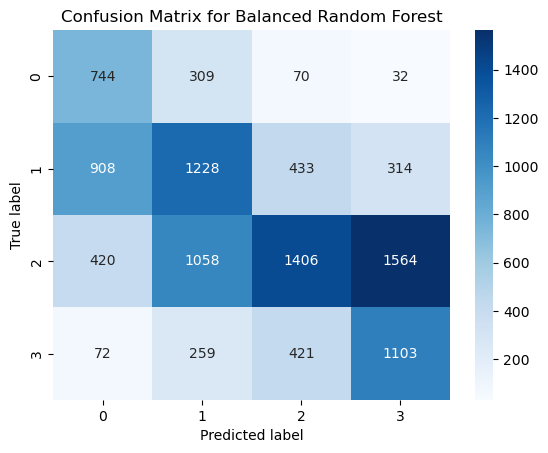

In [91]:
# Plotting confusion matrices
cm_brf = confusion_matrix(validation_Y, pred_brf)

plot_confusion_matrix(cm_brf, classes=["0", "1", "2", "3"], title='Confusion Matrix for Balanced Random Forest')

In [90]:
# Get unique elements and their counts
unique_elements, counts = np.unique(pred_brf, return_counts=True)

# Zip them together for a more readable format
value_counts = dict(zip(unique_elements, counts))

value_counts

{0: 2144, 1: 2854, 2: 2330, 3: 3013}

## XGBoost

**Default XGBoost parameters**

In [60]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(train_X, train_Y)

scores_xgb = cross_val_score(xgb, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_xgb)
print("Mean cross-validation score: ", scores_xgb.mean())

# Performance assessment
xgb_pred = xgb.predict(validation_X)
print("Accuracy on test data:", accuracy_score(validation_Y, xgb_pred))

print(classification_report(validation_Y, xgb_pred))




Accuracy scores for each fold:  [0.56174886 0.55232076 0.55584335 0.55932028 0.55807688]
Mean cross-validation score:  0.5574620264641715
Accuracy on test data: 0.5601972729910066
              precision    recall  f1-score   support

           0       0.59      0.41      0.48      1155
           1       0.54      0.54      0.54      2883
           2       0.57      0.74      0.65      4448
           3       0.51      0.26      0.34      1855

    accuracy                           0.56     10341
   macro avg       0.55      0.49      0.50     10341
weighted avg       0.55      0.56      0.54     10341



**XGBoost with weights (default parameters)**

In [57]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_Y), y=train_Y)
sample_weights = compute_sample_weight(class_weight=dict(enumerate(class_weights)), y=train_Y)

xgb_weight = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_weight.fit(train_X, train_Y, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [96]:
scores_xgb = cross_val_score(xgb_weight, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_xgb)
print("Mean cross-validation score: ", scores_xgb.mean())

# Performance assessment
xgb_pred = xgb_weight.predict(validation_X)
print("Accuracy on test data:", accuracy_score(validation_Y, xgb_pred))

print(classification_report(validation_Y, xgb_pred))

Accuracy scores for each fold:  [0.56174886 0.55232076 0.55584335 0.55932028 0.55807688]
Mean cross-validation score:  0.5574620264641715
Accuracy on test data: 0.4969538729329852
              precision    recall  f1-score   support

           0       0.44      0.61      0.52      1155
           1       0.51      0.48      0.50      2883
           2       0.59      0.45      0.51      4448
           3       0.39      0.57      0.46      1855

    accuracy                           0.50     10341
   macro avg       0.49      0.53      0.50     10341
weighted avg       0.52      0.50      0.50     10341



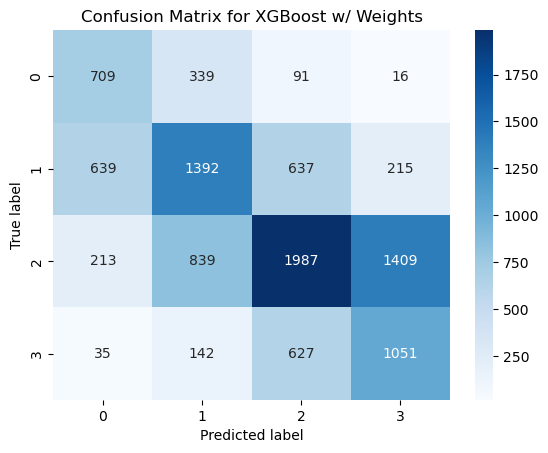

In [102]:
# Plotting confusion matrices
cm_xgb = confusion_matrix(validation_Y, xgb_pred)

plot_confusion_matrix(cm_xgb, classes=["0", "1", "2", "3"], title='Confusion Matrix for XGBoost w/ Weights')

**Tuned XGBoost (without weights)**

In [61]:
xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample':[0.5, 0.8, 1]
}

#clf = GridSearchCV(xgb2, parameters, cv=5, scoring='accuracy', verbose = 2)
#clf.fit(train_X, train_Y)

#best_xgb = clf.best_estimator_
#print(f"Best XGBoost parameters: {clf.best_params_}")

In [99]:
best_xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, max_depth = 5, 
                         n_estimators = 200, subsample = 0.8)

best_xgb_model.fit(train_X, train_Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [100]:
scores_xgb = cross_val_score(best_xgb_model, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_xgb)
print("Mean cross-validation score: ", scores_xgb.mean())

# Performance assessment
xgb_pred2 = best_xgb_model.predict(validation_X)
print("Accuracy on test data:", accuracy_score(validation_Y, xgb_pred2))

print(classification_report(validation_Y, xgb_pred2))

Accuracy scores for each fold:  [0.56806879 0.56309573 0.5663075  0.56553725 0.56854212]
Mean cross-validation score:  0.566310279307294
Accuracy on test data: 0.5648389904264578
              precision    recall  f1-score   support

           0       0.61      0.39      0.48      1155
           1       0.55      0.55      0.55      2883
           2       0.57      0.77      0.65      4448
           3       0.53      0.22      0.31      1855

    accuracy                           0.56     10341
   macro avg       0.56      0.48      0.50     10341
weighted avg       0.56      0.56      0.54     10341



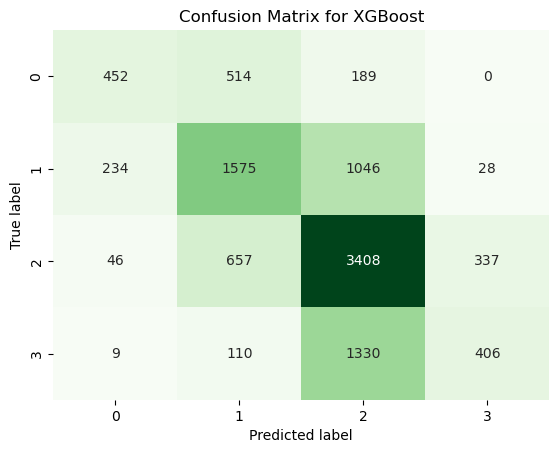

In [146]:
# Plotting confusion matrices
cm_xgb = confusion_matrix(validation_Y, xgb_pred2)

plot_confusion_matrix(cm_xgb, classes=["0", "1", "2", "3"], title='Confusion Matrix for XGBoost')

In [95]:
# Get unique elements and their counts
unique_elements, counts = np.unique(xgb_pred, return_counts=True)

# Zip them together for a more readable format
value_counts = dict(zip(unique_elements, counts))

value_counts

{0: 1596, 1: 2712, 2: 3342, 3: 2691}

**XGBoost with weights and tuned parameters**

In [105]:
xgb3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgbparameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample':[0.5, 0.8, 1]
}



# Create the random search model
rsXGB = RandomizedSearchCV(xgb3, xgbparameters, n_jobs = -1,
                        scoring = 'accuracy', cv = cv,
                        n_iter = 15, verbose = 2, random_state=10)



#rsXGB.fit(train_X, train_Y, sample_weight=sample_weights)

#best_xgb_2 = rsXGB.best_estimator_

#print("Best XGBoost Accuracy: %f using parameters %s" % (rsXGB.best_score_, rsXGB.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best XGBoost Accuracy: 0.540263 using parameters {'subsample': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
[CV] END learning_rate=0.3, max_depth=3, n_estimators=50, subsample=1; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1; total time=  32.6s
[CV] END learning_rate=0.3, max_depth=7, n_estimators=50, subsample=0.8; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1; total time=  20.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   5.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1; total time=   4.8s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   5.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.5; total

In [ ]:
best_xgb_2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, max_depth = 10, 
                         n_estimators = 200, subsample = 1)

best_xgb_2.fit(train_X, train_Y, sample_weight=sample_weights)

In [106]:
scores_xgb2 = cross_val_score(best_xgb_2, train_X, train_Y, cv=5)
print("Accuracy scores for each fold: ", scores_xgb2)
print("Mean cross-validation score: ", scores_xgb2.mean())

# Performance assessment
xgb_pred3 = best_xgb_2.predict(validation_X)
print("Accuracy on test data:", accuracy_score(validation_Y, xgb_pred3))

print(classification_report(validation_Y, xgb_pred3))

Accuracy scores for each fold:  [0.56464981 0.55149192 0.56050559 0.56056367 0.56346493]
Mean cross-validation score:  0.5601351850103206
Accuracy on test data: 0.5302195145537182
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1155
           1       0.52      0.52      0.52      2883
           2       0.58      0.58      0.58      4448
           3       0.43      0.44      0.43      1855

    accuracy                           0.53     10341
   macro avg       0.51      0.51      0.51     10341
weighted avg       0.53      0.53      0.53     10341



In [107]:
# Get unique elements and their counts
unique_elements, counts = np.unique(xgb_pred3, return_counts=True)

# Zip them together for a more readable format
value_counts = dict(zip(unique_elements, counts))

value_counts

{0: 1147, 1: 2905, 2: 4408, 3: 1881}

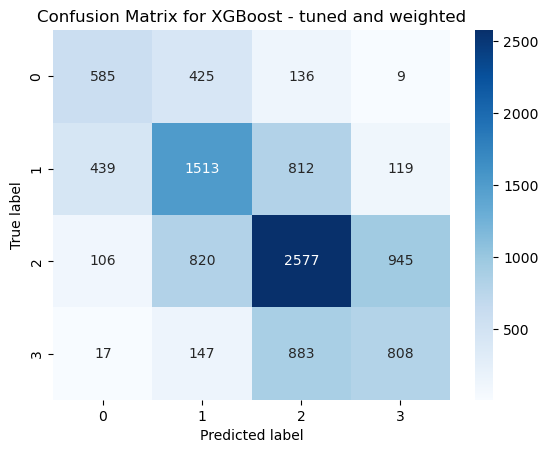

In [108]:
# Plotting confusion matrices
cm_xgb2 = confusion_matrix(validation_Y, xgb_pred3)

plot_confusion_matrix(cm_xgb2, classes=["0", "1", "2", "3"], title='Confusion Matrix for XGBoost - tuned and weighted')

## Feature Importance Across Models (not including KNN)

**Decision Tree**

<Axes: >

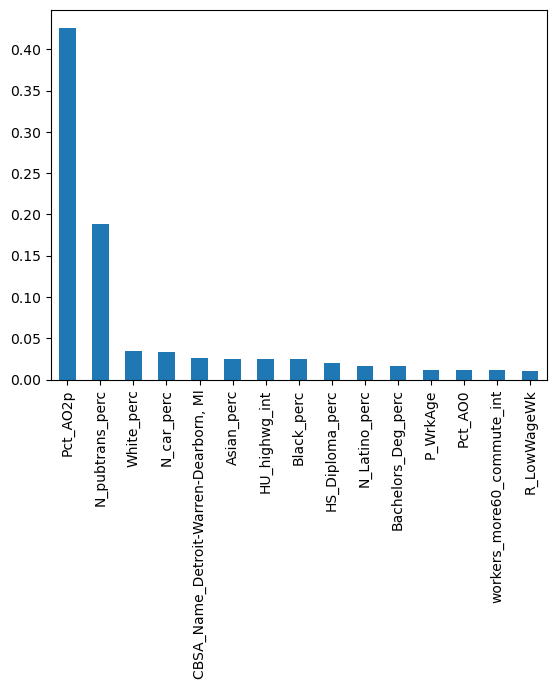

In [66]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_dt = pd.Series(best_tree_model.feature_importances_, index=train_X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_dt[0:15].plot.bar()



In [67]:
feature_importances_dt[0:15]

Pct_AO2p                                 0.426586
N_pubtrans_perc                          0.188244
White_perc                               0.034614
N_car_perc                               0.033207
CBSA_Name_Detroit-Warren-Dearborn, MI    0.026374
Asian_perc                               0.025215
HU_highwg_int                            0.024747
Black_perc                               0.024487
HS_Diploma_perc                          0.020454
N_Latino_perc                            0.016982
Bachelors_Deg_perc                       0.016155
P_WrkAge                                 0.011998
Pct_AO0                                  0.011614
workers_more60_commute_int               0.011254
R_LowWageWk                              0.010667
dtype: float64

**Random Forest**

<Axes: >

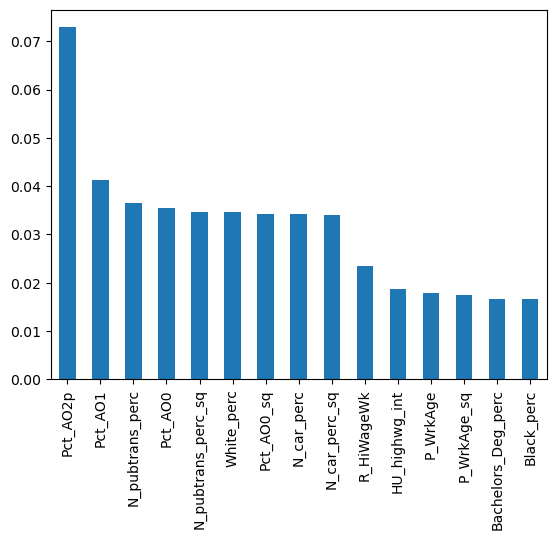

In [68]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_rf = pd.Series(best_rf_model.feature_importances_, index=train_X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_rf[0:15].plot.bar()

In [69]:
feature_importances_rf[0:15]

Pct_AO2p              0.072899
Pct_AO1               0.041244
N_pubtrans_perc       0.036540
Pct_AO0               0.035407
N_pubtrans_perc_sq    0.034678
White_perc            0.034547
Pct_AO0_sq            0.034174
N_car_perc            0.034144
N_car_perc_sq         0.033974
R_HiWageWk            0.023498
HU_highwg_int         0.018722
P_WrkAge              0.017823
P_WrkAge_sq           0.017412
Bachelors_Deg_perc    0.016702
Black_perc            0.016612
dtype: float64

**XGB**

<Axes: >

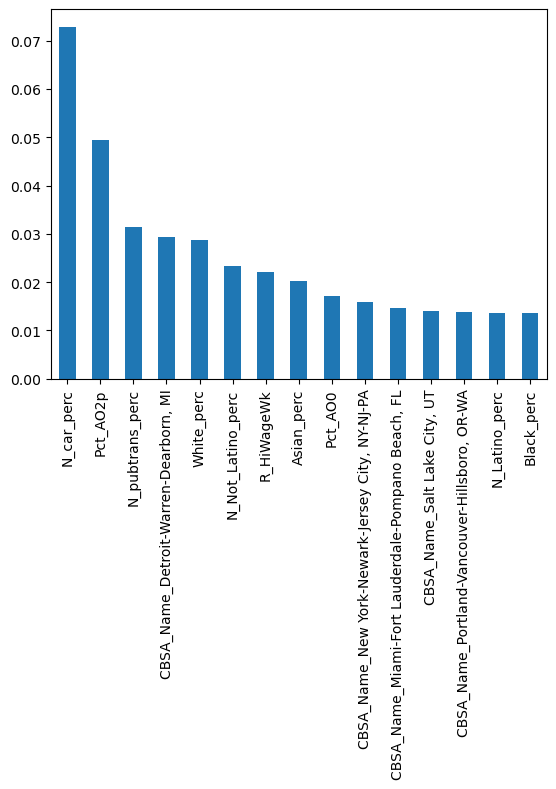

In [70]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_xgb = pd.Series(best_xgb_model.feature_importances_, index=train_X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_xgb[0:15].plot.bar()

In [71]:
feature_importances_xgb[0:15]

N_car_perc                                           0.072896
Pct_AO2p                                             0.049447
N_pubtrans_perc                                      0.031483
CBSA_Name_Detroit-Warren-Dearborn, MI                0.029463
White_perc                                           0.028691
N_Not_Latino_perc                                    0.023327
R_HiWageWk                                           0.022088
Asian_perc                                           0.020277
Pct_AO0                                              0.017103
CBSA_Name_New York-Newark-Jersey City, NY-NJ-PA      0.015932
CBSA_Name_Miami-Fort Lauderdale-Pompano Beach, FL    0.014729
CBSA_Name_Salt Lake City, UT                         0.014106
CBSA_Name_Portland-Vancouver-Hillsboro, OR-WA        0.013921
N_Latino_perc                                        0.013697
Black_perc                                           0.013675
dtype: float32

**Balanced Random Forest**

<Axes: >

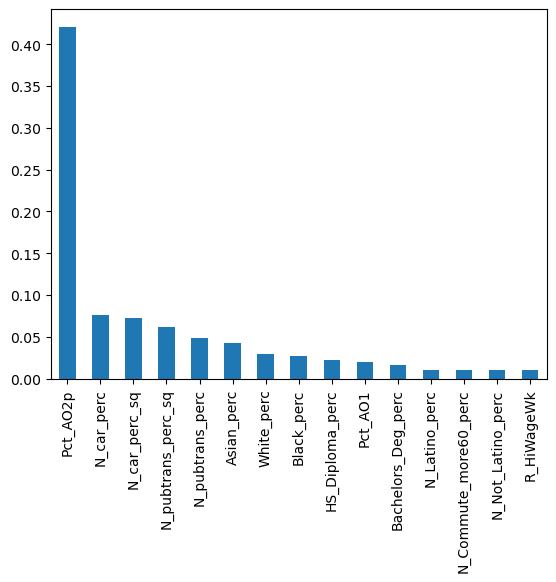

In [48]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_brf = pd.Series(best_Bal_rf_model.feature_importances_, index=train_X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_brf[0:15].plot.bar()

<Axes: >

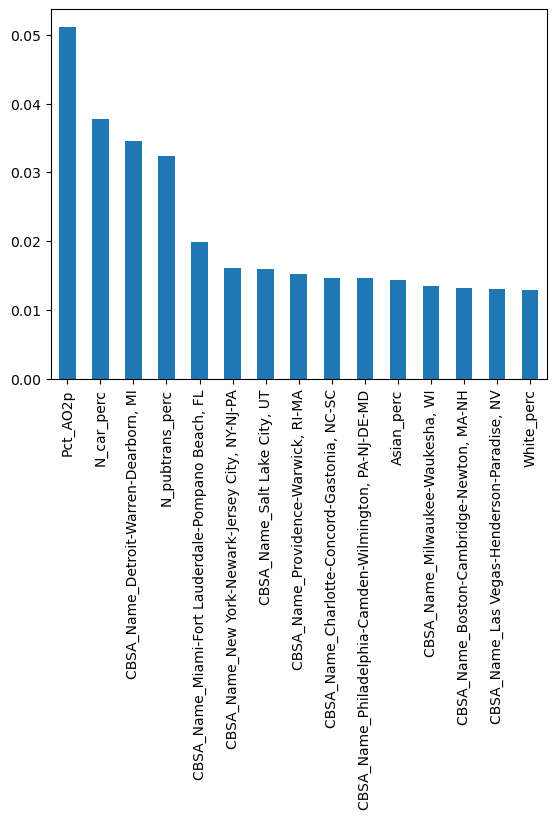

In [109]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances_xgb2 = pd.Series(best_xgb_2.feature_importances_, index=train_X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances_xgb2[0:15].plot.bar()

## Calculating Performance Metrics for Test Data and Comparing Model Results

In [125]:
#used chatgpt to create function
model_metrics2 = {"Model": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}


def evaluate_model(modeltype, model, X_train, y_train, X_test, y_test, modeldict):

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation metrics
    precision = round(precision_score(y_test, y_test_pred, average = "weighted"),3)
    recall = round(recall_score(y_test, y_test_pred, average = "weighted"),3)
    training_accuracy = round(accuracy_score(y_train, y_train_pred),3)
    test_accuracy = round(accuracy_score(y_test, y_test_pred),3)
    f1 = round(f1_score(y_test, y_test_pred, average = "weighted"),3)

    modeldict["Model"].append(modeltype)
    modeldict["Training Accuracy"].append(training_accuracy)
    modeldict["Test Accuracy"].append(test_accuracy)
    modeldict["Precision"].append(precision)
    modeldict["Recall"].append(recall)
    modeldict["F1 Score"].append(f1)
    


    return modeldict



def create_model_dict(modeltype, modellist, X_train, y_train, X_test, y_test, modeldict):
  for i in range(len(modellist)):
    m = modellist[i]
    name = modeltype[i]
    evaluate_model(name, m, X_train, y_train, X_test, y_test, modeldict)
  return(modeldict)

model_metrics2

{'Model': [],
 'Training Accuracy': [],
 'Test Accuracy': [],
 'Precision': [],
 'Recall': [],
 'F1 Score': []}

In [73]:
NWI_metrics2 = model_metrics2.copy()
all_NWI_models = [best_tree_model, best_knn_model, best_rf_model, best_xgb_model]
all_model_types = ["Decision Tree", "KNN", "Random Forest", "XGBoost"]


NWI_model_results = create_model_dict(all_model_types, all_NWI_models, train_X, train_Y,
                                      test_X, test_Y, NWI_metrics2)

NWI_df = pd.DataFrame(NWI_model_results)
NWI_df


Model  Training Accuracy  Test Accuracy  Precision  Recall  \
0  Decision Tree              0.538          0.526      0.522   0.526   
1            KNN              1.000          0.537      0.544   0.537   
2  Random Forest              0.688          0.555      0.571   0.555   
3        XGBoost              0.658          0.571      0.569   0.571   

   F1 Score  
0     0.486  
1     0.506  
2     0.518  
3     0.549

**comparing precision/recall by class**

In [74]:
#code from chatgpt
dt_test_pred = best_tree_model.predict(test_X)
knn_test_pred = best_knn_model.predict(test_X)
rf_test_pred = best_rf_model.predict(test_X)
xgb_test_pred = best_xgb_model.predict(test_X)


# Calculate precision for each model and class
models = ['Decision Tree', 'KNN', 'Random Forest', 'XGBoost']
precision_scores = {}
for model, preds in zip(models, [dt_test_pred, knn_test_pred, rf_test_pred, xgb_test_pred]):
    precision_scores[model] = precision_score(test_Y, preds, average=None)

# Create a DataFrame from precision scores
precision_df = pd.DataFrame(precision_scores, index=[f'NWI Cat {i}' for i in range(len(precision_scores['Decision Tree']))])

# Transpose DataFrame for better readability
#precision_df = precision_df.transpose()

print(precision_df)


           Decision Tree       KNN  Random Forest   XGBoost
NWI Cat 0       0.604697  0.572932       0.689507  0.618598
NWI Cat 1       0.517544  0.484474       0.534500  0.564758
NWI Cat 2       0.528004  0.566520       0.551187  0.572394
NWI Cat 3       0.463576  0.570370       0.601399  0.536814


In [75]:
recall_scores = {}
for model, preds in zip(models, [dt_test_pred, knn_test_pred, rf_test_pred, xgb_test_pred]):
    recall_scores[model] = recall_score(test_Y, preds, average=None)

# Create a DataFrame from precision scores
recall_df = pd.DataFrame(recall_scores, index=[f'NWI Cat {i}' for i in range(len(precision_scores['Decision Tree']))])

# Transpose DataFrame for better readability
#precision_df = precision_df.transpose()

print(recall_df)


           Decision Tree       KNN  Random Forest   XGBoost
NWI Cat 0       0.269398  0.332171       0.280732  0.400174
NWI Cat 1       0.479350  0.623223       0.558565  0.560934
NWI Cat 2       0.796502  0.704065       0.796048  0.769475
NWI Cat 3       0.114255  0.125680       0.140370  0.218172


**Comparing against control models**

In [76]:
#creating all control models (will not tune them)
controltree = DecisionTreeClassifier(criterion='entropy', random_state=10)
controltree.fit(ctrain_X, ctrain_y)

controlknn = KNeighborsClassifier()
controlknn.fit(ctrain_X, ctrain_y)

controlrf = RandomForestClassifier(random_state = 10)
controlrf.fit(ctrain_X, ctrain_y)

controlxgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
controlxgb.fit(ctrain_X, ctrain_y)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [77]:
#used chatgpt to create function
model_metrics3 = {"Model": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}


NWI_control = model_metrics3.copy()
all_control_models = [controltree, controlknn, controlrf, controlxgb]
all_model_types = ["Decision Tree", "KNN", "Random Forest", "XGBoost"]


NWI_model_results2 = create_model_dict(all_model_types, all_control_models, ctrain_X, ctrain_y,
                                      ctest_X, ctest_y, NWI_control)

NWI_df2 = pd.DataFrame(NWI_model_results2)
NWI_df2

Model  Training Accuracy  Test Accuracy  Precision  Recall  \
0  Decision Tree              1.000          0.959      0.959   0.959   
1            KNN              0.928          0.899      0.899   0.899   
2  Random Forest              1.000          0.976      0.976   0.976   
3        XGBoost              1.000          0.982      0.982   0.982   

   F1 Score  
0     0.959  
1     0.899  
2     0.976  
3     0.982

## Calculating ROC-AUC for one versus rest (OVR) for the different classes

**Random Forest**

In [78]:
#functions for this calculation are from github and TDS

# Plots the Probability Distributions and the ROC Curves One vs Rest




def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

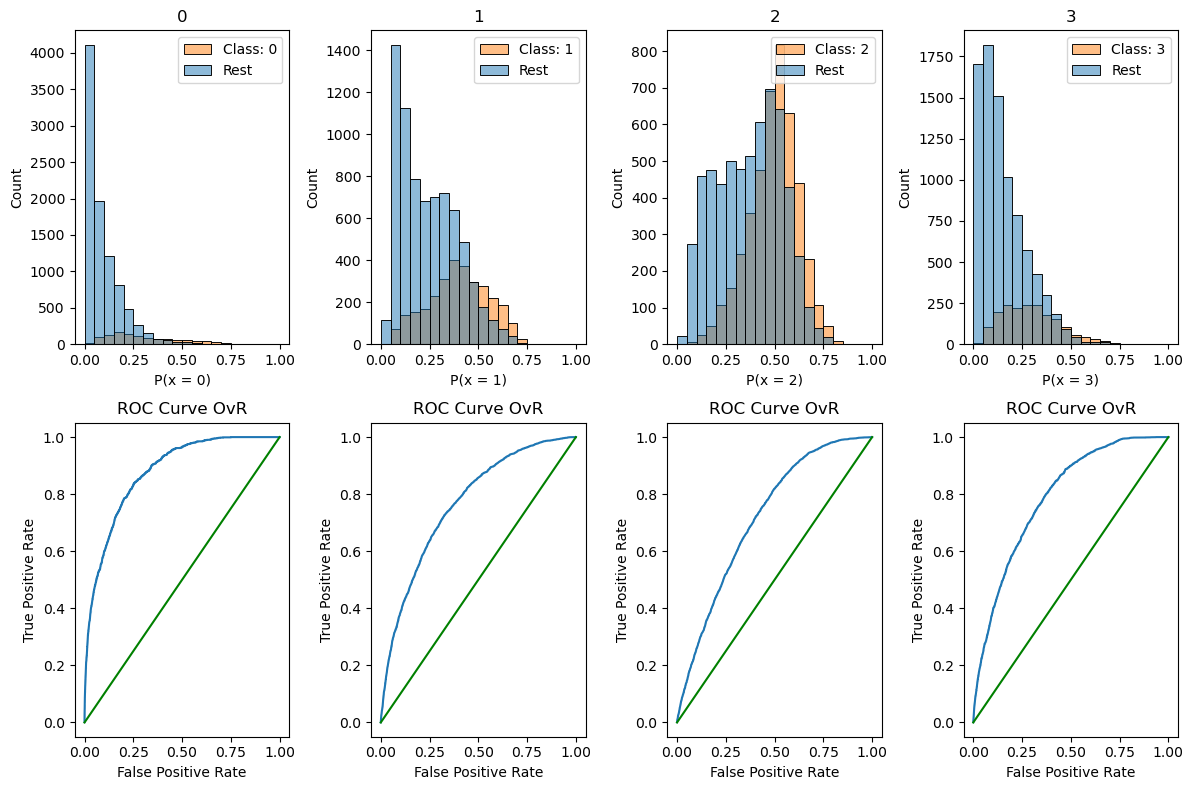

In [91]:
#functions are from github and TDS
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_rf = {}

def roc_auc_ovr_scores(model, features, answerdict, target):
    classes = [0,1,2,3]
    y_proba = model.predict_proba(features)
    for i in range(len(classes)):
        # Gets the class
        c = classes[i]
        # Prepares an auxiliar dataframe to help with the plots
        df_aux = features.copy()
        df_aux['class'] = [1 if y == c else 0 for y in target]
        df_aux['prob'] = y_proba[:, i]
        df_aux = df_aux.reset_index(drop = True)

        # Plots the probability distribution for the class and the rest
        ax = plt.subplot(2, 4, i+1)
        sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(c)
        ax.legend([f"Class: {c}", "Rest"])
        ax.set_xlabel(f"P(x = {c})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 4, i+5)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve OvR")
        # Calculates the ROC AUC OvR
        answerdict[c] = round(roc_auc_score(df_aux['class'], df_aux['prob']),3)
    plt.tight_layout()
    
roc_auc_ovr_scores(best_rf_model, test_X, roc_auc_ovr_rf, test_Y)


In [92]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr_rf:
    avg_roc_auc += roc_auc_ovr_rf[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr_rf[k]}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")



0 ROC AUC OvR: 0.877
1 ROC AUC OvR: 0.767
2 ROC AUC OvR: 0.718
3 ROC AUC OvR: 0.789
average ROC AUC OvR: 0.7878


In [93]:
roc_auc_ovr_rf


{0: 0.877, 1: 0.767, 2: 0.718, 3: 0.789}

**KNN**

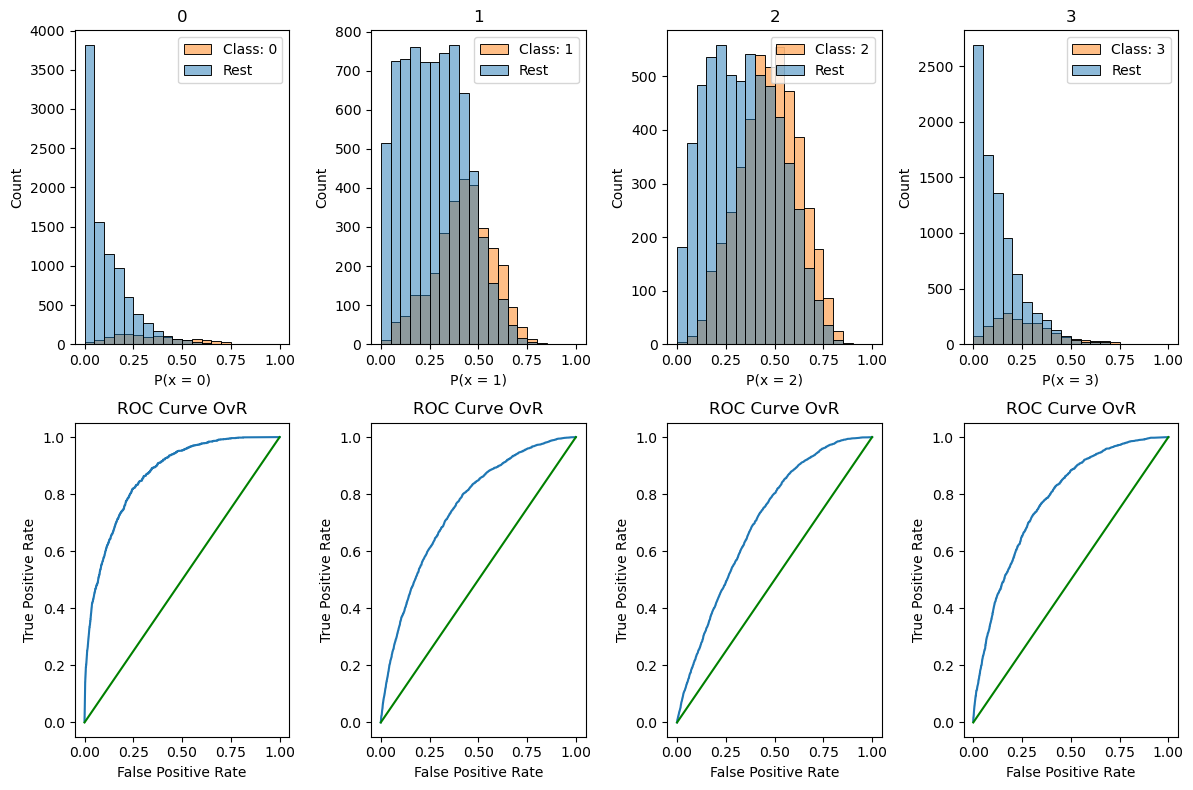

In [94]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_knn = {}

roc_auc_ovr_scores(best_knn_model, test_X, roc_auc_ovr_knn, test_Y)




In [95]:
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr_knn:
    avg_roc_auc += roc_auc_ovr_knn[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr_knn[k]}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")



0 ROC AUC OvR: 0.868
1 ROC AUC OvR: 0.754
2 ROC AUC OvR: 0.705
3 ROC AUC OvR: 0.778
average ROC AUC OvR: 0.7762


**Decision Trees**

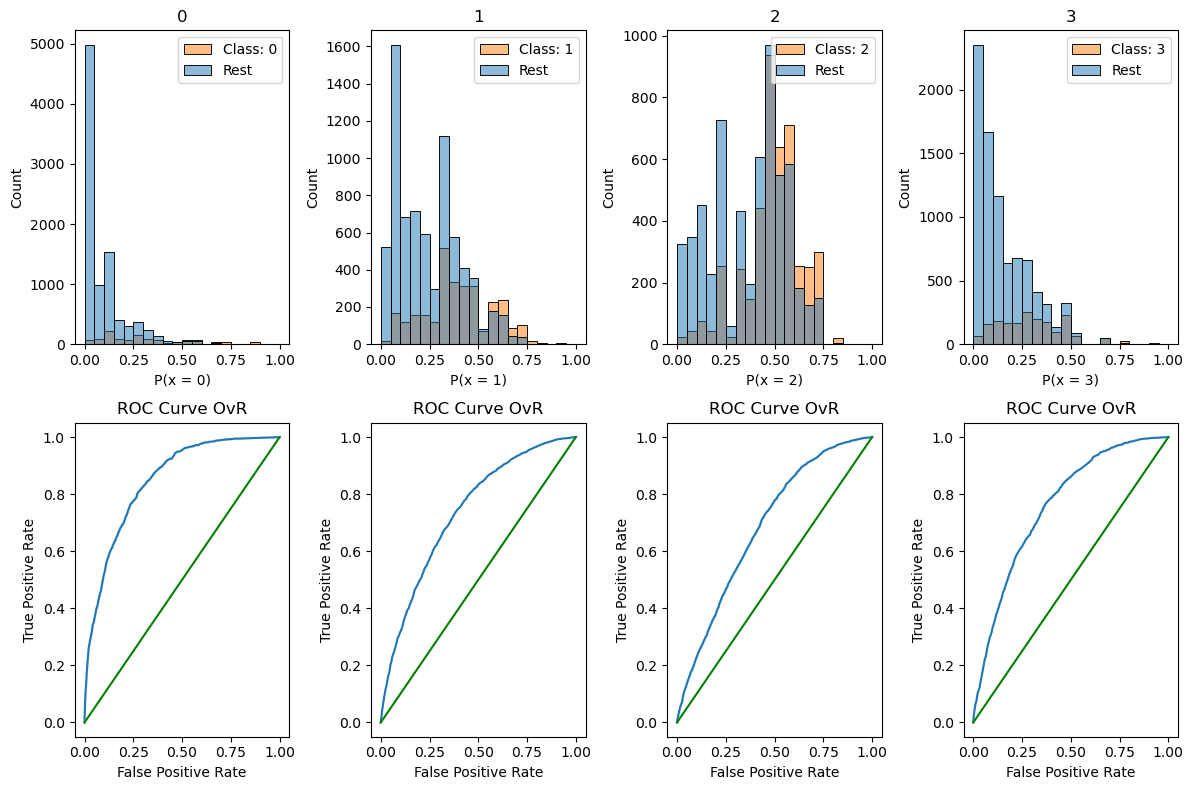

In [96]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_dt = {}


roc_auc_ovr_scores(best_tree_model, test_X, roc_auc_ovr_dt, test_Y)


In [97]:
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr_dt:
    avg_roc_auc += roc_auc_ovr_dt[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr_dt[k]}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")



0 ROC AUC OvR: 0.848
1 ROC AUC OvR: 0.737
2 ROC AUC OvR: 0.686
3 ROC AUC OvR: 0.76
average ROC AUC OvR: 0.7577


**XG Boost**

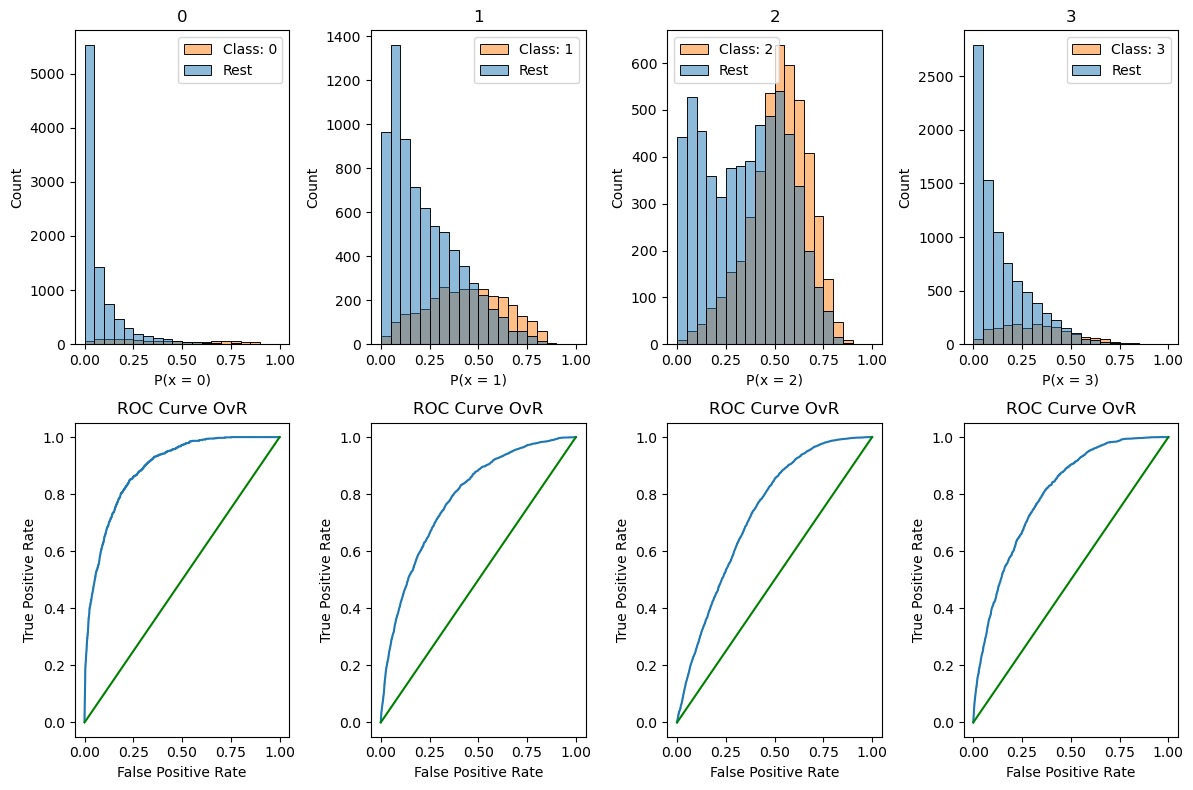

In [98]:
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = train_Y.unique().tolist()
roc_auc_ovr_xgb = {}


    
roc_auc_ovr_scores(best_xgb_model, test_X, roc_auc_ovr_xgb, test_Y)



In [99]:
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr_xgb:
    avg_roc_auc += roc_auc_ovr_xgb[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr_xgb[k]}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")



0 ROC AUC OvR: 0.891
1 ROC AUC OvR: 0.786
2 ROC AUC OvR: 0.732
3 ROC AUC OvR: 0.797
average ROC AUC OvR: 0.8015


**All Results Together**

In [100]:
ROC_df = pd.DataFrame([roc_auc_ovr_dt, roc_auc_ovr_knn, roc_auc_ovr_rf, roc_auc_ovr_xgb])

print(ROC_df)



       0      1      2      3
0  0.848  0.737  0.686  0.760
1  0.868  0.754  0.705  0.778
2  0.877  0.767  0.718  0.789
3  0.891  0.786  0.732  0.797


In [89]:
ROC_df.columns




Int64Index([3, 1, 2, 0], dtype='int64')

In [101]:
# Rename columns
ROC_df.rename(columns={2: 'Above Average Walkable', 1: 'Below Average Walkable', 0: 'Least Walkable', 
                       3: 'Most Walkable'}, inplace=True)

# Rename index (rows)
ROC_df.rename(index={0: 'DT', 1: 'KNN', 2: 'RF', 3: 'XGB'}, inplace=True)

ROC_df


Least Walkable  Below Average Walkable  Above Average Walkable  \
DT            0.848                   0.737                   0.686   
KNN           0.868                   0.754                   0.705   
RF            0.877                   0.767                   0.718   
XGB           0.891                   0.786                   0.732   

     Most Walkable  
DT           0.760  
KNN          0.778  
RF           0.789  
XGB          0.797

**Comparing Prediction Results - weighted versus unweighted models**


In [114]:
test_values, test_counts = np.unique(test_Y, return_counts=True)

# Zip them together for a more readable format
test_value_counts = dict(zip(test_values, test_counts))

test_value_counts

{0: 1147, 1: 2954, 2: 4403, 3: 1838}

In [112]:
xgb_w_pred_test = best_xgb_2.predict(test_X)

# Get unique elements and their counts
unique_elements_xgb_w, counts_xgb_w = np.unique(xgb_w_pred_test, return_counts=True)

# Zip them together for a more readable format
value_counts_xgb_w = dict(zip(unique_elements_xgb_w, counts_xgb_w))

value_counts_xgb_w


{0: 1085, 1: 3067, 2: 4395, 3: 1795}

In [113]:
xgb_uw_pred_test = best_xgb_model.predict(test_X)

# Get unique elements and their counts
unique_elements_xgb_uw, counts_xgb_uw = np.unique(xgb_uw_pred_test, return_counts=True)

# Zip them together for a more readable format
value_counts_xgb_uw = dict(zip(unique_elements_xgb_uw, counts_xgb_uw))

value_counts_xgb_uw

{0: 742, 1: 2934, 2: 5919, 3: 747}

In [115]:
test_brf = best_Bal_rf_model.predict(test_X)

# Get unique elements and their counts
unique_elements_brf, counts_brf = np.unique(test_brf, return_counts=True)

# Zip them together for a more readable format
value_counts_brf = dict(zip(unique_elements_brf, counts_brf))

value_counts_brf

{0: 2220, 1: 2857, 2: 2298, 3: 2967}

In [116]:
test_rf = best_rf_model.predict(test_X)

# Get unique elements and their counts
unique_elements_rf, counts_rf = np.unique(test_rf, return_counts=True)

# Zip them together for a more readable format
value_counts_rf = dict(zip(unique_elements_rf, counts_rf))

value_counts_rf

{0: 455, 1: 3102, 2: 6362, 3: 423}

In [122]:
weights_df = pd.DataFrame([test_value_counts, value_counts_rf, value_counts_brf, value_counts_xgb_uw, value_counts_xgb_w])

weights_df = weights_df.transpose()

weights_df

weights_df.rename(index={2: 'Above Average Walkable', 1: 'Below Average Walkable', 0: 'Least Walkable', 
                       3: 'Most Walkable'}, inplace=True)

# Rename index (rows)
weights_df.rename(columns={0: 'True Values', 1: 'RF_unweighted', 2: 'RF_weighted', 3: 'XGB_unweighted', 4: "XGB_weighted"}, inplace=True)

weights_df

True Values  RF_unweighted  RF_weighted  \
Least Walkable                 1147            455         2220   
Below Average Walkable         2954           3102         2857   
Above Average Walkable         4403           6362         2298   
Most Walkable                  1838            423         2967   

                        XGB_unweighted  XGB_weighted  
Least Walkable                     742          1085  
Below Average Walkable            2934          3067  
Above Average Walkable            5919          4395  
Most Walkable                      747          1795

In [126]:
model_metrics_weighted = {"Model": [], "Training Accuracy": [], "Test Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

all_NWI_models = [best_rf_model, best_Bal_rf_model, best_xgb_model, best_xgb_2]
all_model_types = ["Random Forest - Unweighted", "Random Forest - Weighted", "XGBoost - Unweighted", "XGBoost - Weighted"]


NWI_weighted_results = create_model_dict(all_model_types, all_NWI_models, train_X, train_Y,
                                      test_X, test_Y, model_metrics_weighted)

NWI2_df = pd.DataFrame(NWI_weighted_results)
NWI2_df

Model  Training Accuracy  Test Accuracy  Precision  \
0  Random Forest - Unweighted              0.687          0.553      0.568   
1    Random Forest - Weighted              0.454          0.431      0.481   
2        XGBoost - Unweighted              0.658          0.571      0.569   
3          XGBoost - Weighted              0.971          0.547      0.547   

   Recall  F1 Score  
0   0.553     0.516  
1   0.431     0.427  
2   0.571     0.549  
3   0.547     0.547